In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


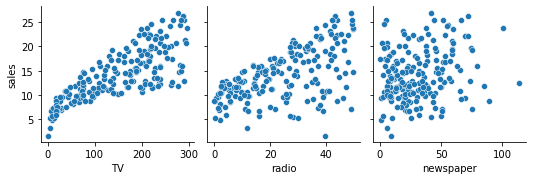

In [7]:
sns.pairplot(data = df, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales')

In [8]:
X = df.drop('sales', axis = 1)

In [10]:
y = df['sales']

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [15]:
len(df)

200

In [16]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
prediction = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

<AxesSubplot:xlabel='sales', ylabel='Count'>

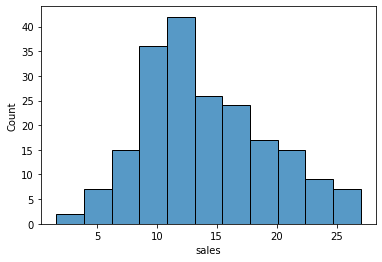

In [25]:
sns.histplot(data = df, x = 'sales')

In [26]:
mean_absolute_error(y_test, prediction)

1.4937750024728964

In [28]:
df['sales'].mean()

14.022500000000003

In [29]:
mean_squared_error(y_test, prediction)

3.727928330681506

In [30]:
np.sqrt(mean_squared_error(y_test, prediction))

1.9307843822347193

In [31]:
test_residuals = y_test - prediction

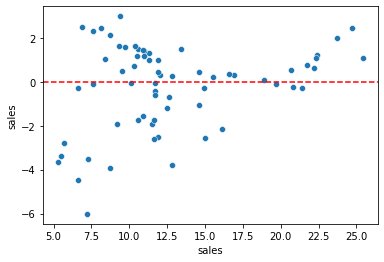

In [33]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'r', ls = '--')

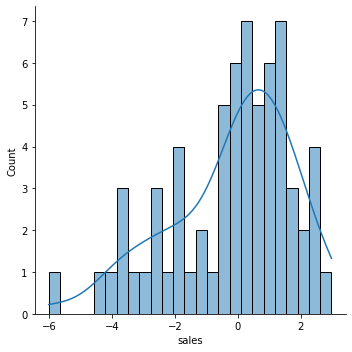

In [36]:
sns.displot(x = test_residuals, bins = 25, kde = True)

In [37]:
import scipy as sp

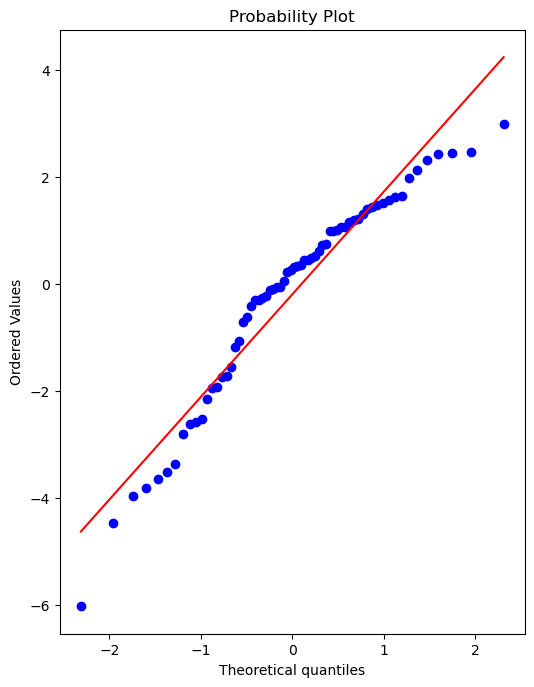

In [38]:
fig, ax = plt.subplots(figsize = (6, 8), dpi = 100)
_ = sp.stats.probplot(test_residuals, plot = ax)

In [39]:
final_model = LinearRegression()

In [40]:
final_model.fit(X, y)

LinearRegression()

In [41]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [42]:
y_hat = final_model.predict(X)

In [43]:
from joblib import dump, load

In [44]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [45]:
loaded_model = load('final_sales_model.joblib')

In [46]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [47]:
campaign = [[149, 22, 12]]

In [48]:
loaded_model.predict(campaign)

array([13.893032])